In [1]:
import numpy as np
import matplotlib.pyplot as plt

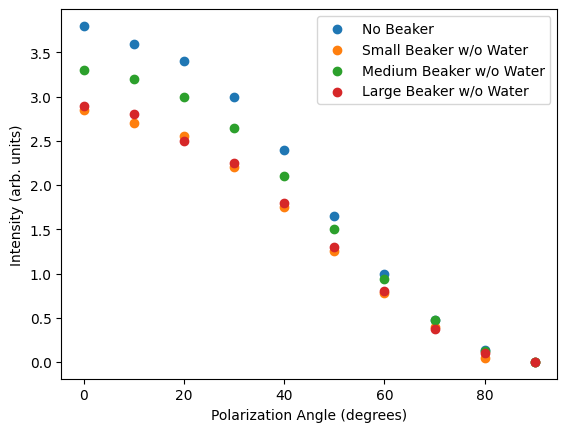

In [10]:
# No beaker (control)
no_beaker_polariztion = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
no_beaker_intensity = np.array([0.0, 0.14, 0.47, 1.00, 1.65, 2.40, 3.0, 3.4, 3.6, 3.8])

# Small beaker without water
small_beaker_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_intensity = np.array([0.0, 0.05, 0.40, 0.78, 1.25, 1.75, 2.20, 2.55, 2.70, 2.85])

# Medium beaker without water
medium_beaker_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_intensity = np.array([0.0, 0.12, 0.47, 0.94, 1.50, 2.10, 2.65, 3.0, 3.2, 3.3])

# Large beaker without water
large_beaker_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_intensity = np.array([0.0, 0.10, 0.37, 0.80, 1.30, 1.80, 2.25, 2.50, 2.80, 2.90])

# Plot the data
plt.scatter(no_beaker_polariztion, no_beaker_intensity, label='No Beaker')
plt.scatter(small_beaker_polarization, small_beaker_intensity, label='Small Beaker w/o Water')
plt.scatter(medium_beaker_polarization, medium_beaker_intensity, label='Medium Beaker w/o Water')
plt.scatter(large_beaker_polarization, large_beaker_intensity, label='Large Beaker w/o Water')
plt.xlabel('Polarization Angle (degrees)')
plt.ylabel('Intensity (arb. units)')
plt.legend(loc='best')
plt.show()

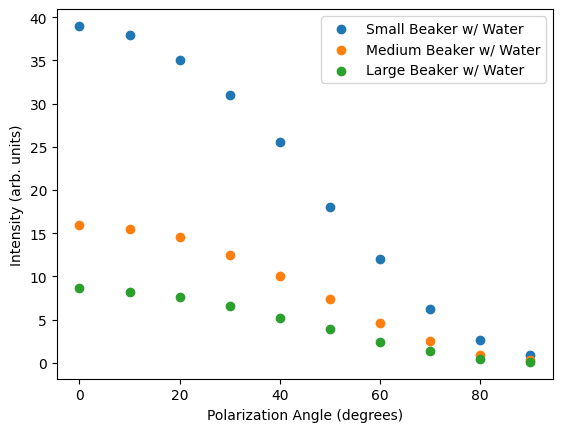

In [15]:
# Small beaker with water
small_beaker_with_water_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_with_water_intensity = np.array([0.88, 2.65, 6.2, 12.0, 18.0, 25.5, 31, 35, 38, 39])

# Medium beaker with water
medium_beaker_with_water_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_with_water_intensity = np.array([0.27, 0.88, 2.50, 4.6, 7.4, 10.0, 12.5, 14.5, 15.5, 16.0])

# Large beaker with water
large_beaker_with_water_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_with_water_intensity = np.array([0.09, 0.43, 1.30, 2.40, 3.9, 5.2, 6.6, 7.6, 8.2, 8.6])

# Plot the data
plt.scatter(small_beaker_with_water_polarization, small_beaker_with_water_intensity, label='Small Beaker w/ Water')
plt.scatter(medium_beaker_with_water_polarization, medium_beaker_with_water_intensity, label='Medium Beaker w/ Water')
plt.scatter(large_beaker_with_water_polarization, large_beaker_with_water_intensity, label='Large Beaker w/ Water')
plt.xlabel('Polarization Angle (degrees)')
plt.ylabel('Intensity (arb. units)')
plt.legend(loc='best')
plt.show()

11 11


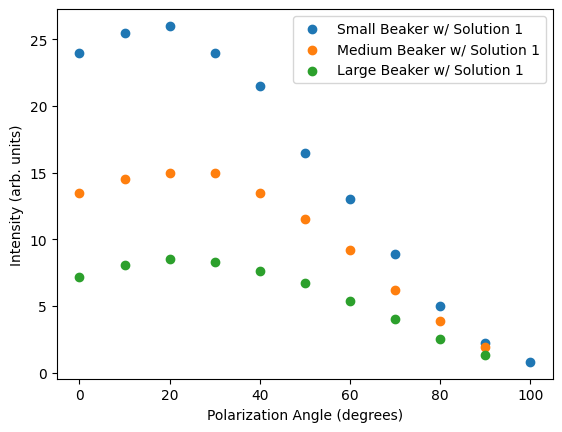

In [13]:
# Solution 1 (300.5 g of sugar, total volume of 1002 mL)

# Large beaker with solution 1
large_beaker_solution1_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_solution1_intensity = np.array([1.30, 2.50, 4.0, 5.40, 6.7, 7.6, 8.3, 8.5, 8.1, 7.2])

# Medium beaker with solution 1
medium_beaker_solution1_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_solution1_intensity = np.array([1.90, 3.9, 6.2, 9.2, 11.5, 13.5, 15.0, 15.0, 14.5, 13.5])

# Small beaker with solution 1
small_beaker_solution1_polarization = np.array([100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_solution1_intensity = np.array([0.8, 2.25, 5.0, 8.9, 13.0, 16.5, 21.5, 24.0, 26.0, 25.5, 24.0])

# Plot the data
plt.scatter(small_beaker_solution1_polarization, small_beaker_solution1_intensity, label='Small Beaker w/ Solution 1')
plt.scatter(medium_beaker_solution1_polarization, medium_beaker_solution1_intensity, label='Medium Beaker w/ Solution 1')
plt.scatter(large_beaker_solution1_polarization, large_beaker_solution1_intensity, label='Large Beaker w/ Solution 1')
plt.xlabel('Polarization Angle (degrees)')
plt.ylabel('Intensity (arb. units)')
plt.legend(loc='best')
plt.show()

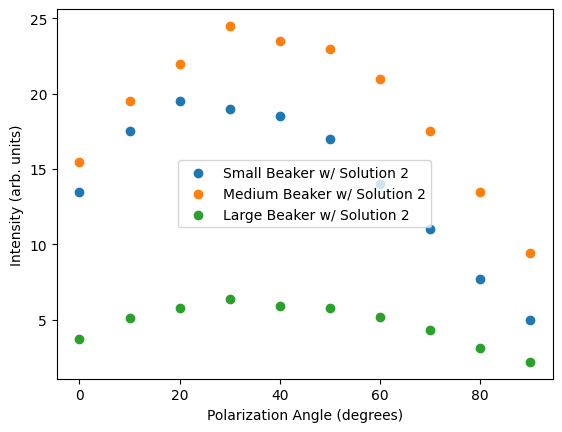

In [14]:
# Solution 2 (600.7 g of sugar, total volume of 1018 mL)

# Large beaker with solution 2
large_beaker_solution2_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
large_beaker_solution2_intensity = np.array([2.2, 3.1, 4.3, 5.2, 5.8, 5.9, 6.4, 5.8, 5.1, 3.7])

# Medium beaker with solution 2
medium_beaker_solution2_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
medium_beaker_solution2_intensity = np.array([9.4, 13.5, 17.5, 21.0, 23.0, 23.5, 24.5, 22.0, 19.5, 15.5])

# Small beaker with solution 2
small_beaker_solution2_polarization = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10, 0])
small_beaker_solution2_intensity = np.array([5.0, 7.7, 11.0, 14.0, 17.0, 18.5, 19.0, 19.5, 17.5, 13.5])

# Plot the data
plt.scatter(small_beaker_solution2_polarization, small_beaker_solution2_intensity, label='Small Beaker w/ Solution 2')
plt.scatter(medium_beaker_solution2_polarization, medium_beaker_solution2_intensity, label='Medium Beaker w/ Solution 2')
plt.scatter(large_beaker_solution2_polarization, large_beaker_solution2_intensity, label='Large Beaker w/ Solution 2')
plt.xlabel('Polarization Angle (degrees)')
plt.ylabel('Intensity (arb. units)')
plt.legend(loc='best')
plt.show()

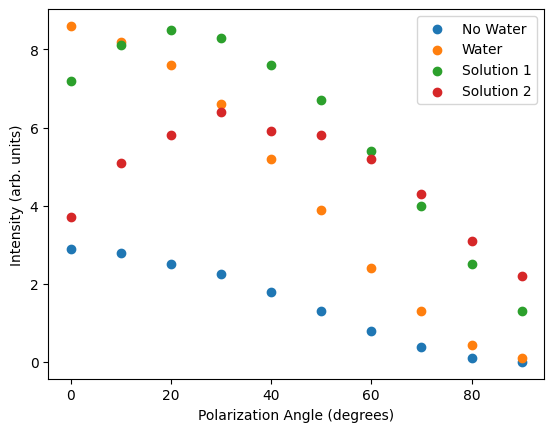

In [25]:
# Large beaker path length plot (108.8 mm)

plt.scatter(large_beaker_polarization, large_beaker_intensity, label='No Water')
plt.scatter(large_beaker_with_water_polarization, large_beaker_with_water_intensity, label='Water')
plt.scatter(large_beaker_solution1_polarization, large_beaker_solution1_intensity, label='Solution 1')
plt.scatter(large_beaker_solution2_polarization, large_beaker_solution2_intensity, label='Solution 2')
plt.xlabel('Polarization Angle (degrees)')
plt.ylabel('Intensity (arb. units)')
plt.legend(loc='best')
plt.show()

polarization

light_intensity

water_plus_sugar_volume

sugar_mass

In [5]:
small_beaker_length = 69.9

# measurement occured at intervals of 10 degrees from 0 to 90 on the first polarization lens

# for polarization: take raw reading and subtract offset (from where the angle is measured) of 60 degrees

polarization_wo_beaker = np.array([90,80, 70, 60, 50, 40, 30, 20, 10, 0])
intensity_wo_beaker = np.array([0, 0.14, 0.47, 1.00, 1.65, 2.40, 3.0, 3.4, 3.6, 3.8])

polarization_w_beaker = np.array([90,80, 70, 60, 50, 40, 30, 20, 10, 0])
intensity_w_beaker = np.array([0, ])

array([], dtype=float64)